# Курсовой проект для курса "Python для Data Science"

## Задание

Материалы к проекту (файлы):
train.csv
test.csv

Задание:
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).
С помощью полученной модели предсказать цены для квартир из файла test.csv.

Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

Сдача проекта:
1. Прислать в раздел Задания Урока 10 ("Вебинар. Консультация по итоговому проекту")
ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook 
с расширением ipynb). (Pull request не нужен, только ссылка ведущая на сам скрипт).
2. Приложить файл с названием по образцу SShirkin_predictions.csv
с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).
В файле с предсказаниями должна быть 5001 строка (шапка + 5000 предсказаний).

Сроки и условия сдачи:
Дедлайн: сдать проект нужно в течение 72 часов после начала Урока 10 ("Вебинар. Консультация по итоговому проекту").
Для успешной сдачи должны быть все предсказания (для 5000 квартир) и R2 должен быть больше 0.6.
При сдаче до дедлайна результат проекта может попасть в топ лучших результатов.
Повторная сдача и проверка результатов возможны только при условии предыдущей неуспешной сдачи.
Успешный проект нельзя пересдать в целях повышения результата.
Проекты, сданные после дедлайна или сданные повторно, не попадают в топ лучших результатов, но можно узнать результат.
В качестве итогового результата берется первый успешный результат, последующие успешные результаты не учитываются.

Примечание:
Все файлы csv должны содержать названия полей (header - то есть "шапку"),
разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

Рекомендации для файла с кодом (ipynb):
1. Файл должен содержать заголовки и комментарии
2. Повторяющиеся операции лучше оформлять в виде функций
3. Не делать вывод большого количества строк таблиц (5-10 достаточно)
4. По возможности добавлять графики, описывающие данные (около 3-5)
5. Добавлять только лучшую модель, то есть не включать в код все варианты решения проекта
6. Скрипт проекта должен отрабатывать от начала и до конца (от загрузки данных до выгрузки предсказаний)
7. Весь проект должен быть в одном скрипте (файл ipynb).
8. При использовании статистик (среднее, медиана и т.д.) в качестве признаков,
лучше считать их на трейне, и потом на валидационных и тестовых данных не считать 
статистики заново, а брать их с трейна. Если хватает знаний, можно использовать кросс-валидацию,
но для сдачи этого проекта достаточно разбить данные из train.csv на train и valid.
9. Проект должен полностью отрабатывать за разумное время (не больше 10 минут),
поэтому в финальный вариант лучше не включать GridSearch с перебором 
большого количества сочетаний параметров.
10. Допускается применение библиотек Python и моделей машинного обучения,
которые были в курсе Python для Data Science. Градиентный бустинг изучается
в последующих курсах, поэтому в этом проекте его применять не следует.
Самая сложная из допустимых моделей - RandomForestRegressor из sklearn.

## Решение:

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Предварительная обработка данных

In [456]:
# загрузка тренировочного датафрейма
df = pd.read_csv("./GB_HW6/train.csv")
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [458]:
# ищем пустые строки
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Видим, что пропущенные строки есть в двух столбцах LifeSquare и Healthcare_1 (числовые признаки)

In [459]:
# заполняем отсутсвующие значения медианными
df['LifeSquare'].fillna(df['LifeSquare'].median(), inplace=True)
df['Healthcare_1'].fillna(df['Healthcare_1'].median(), inplace=True)

In [460]:
# ищем пустые строки
df.isnull().sum().sum()

0

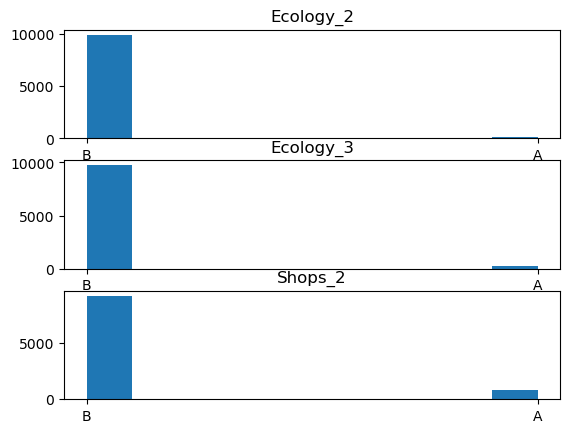

In [461]:
# Категориальные признаки (смотрим количество данных)
fig, ax = plt.subplots(nrows=3, ncols=1)
ax1, ax2, ax3 = ax.flatten()

ax1.hist(df['Ecology_2'])
ax1.set_title('Ecology_2')

ax2.hist(df['Ecology_3'])
ax2.set_title('Ecology_3')

ax3.hist(df['Shops_2'])
ax3.set_title('Shops_2')

plt.show()

Видим, что есть 2 категории A и B.

Преобразуем в числовые признаки.

In [462]:
from sklearn.preprocessing import LabelEncoder

# Перевод категориальных признаков в числовые
le = LabelEncoder()

# Преобразуем буквеное обозначение в цифровое
df['Ecology_2'] = le.fit_transform(df['Ecology_2'].astype(str))
df['Ecology_3'] = le.fit_transform(df['Ecology_3'].astype(str))
df['Shops_2'] = le.fit_transform(df['Shops_2'].astype(str))

df

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,1,33,7976,5,900.0,0,11,1,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,1,46,10309,1,240.0,1,16,1,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,1,34,7759,0,229.0,1,3,1,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,1,23,5735,3,1084.0,0,5,1,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,1,35,5776,1,2078.0,2,4,1,150226.531644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,1,1,46,7960,6,350.0,3,11,1,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,1,1,30,5562,0,900.0,0,5,0,189050.289571
9997,5123,27,1.0,47.939008,32.781260,1.0,12,16.0,2015,0.072158,1,1,2,629,1,900.0,0,0,0,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,1,0,30,5048,9,325.0,2,5,1,181595.339808


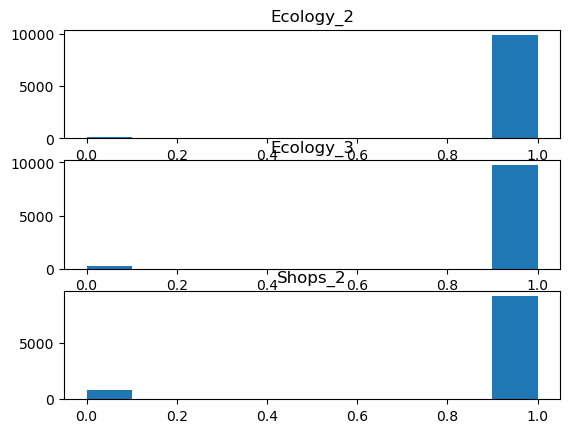

In [463]:
fig, ax = plt.subplots(nrows=3, ncols=1)
ax1, ax2, ax3 = ax.flatten()

ax1.hist(df['Ecology_2'])
ax1.set_title('Ecology_2')

ax2.hist(df['Ecology_3'])
ax2.set_title('Ecology_3')

ax3.hist(df['Shops_2'])
ax3.set_title('Shops_2')

plt.show()

In [464]:
# посмотрим статистические данные
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,36.266040,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.990300,0.972500,24.687000,5352.157400,8.039200,1026.358900,1.319500,4.231300,0.917500,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,76.609981,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,746.662828,1.493601,4.806341,0.275139,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,25.527399,1.000000,4.000000,9.000000,1.974000e+03,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,1.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,1.000000,1.000000,36.000000,7227.000000,5.000000,990.000000,2.000000,6.000000,1.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


### Построение графиков, распределение признаков

In [465]:
# преобразование в лист
num_cols = []

cols_and_type = df.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)

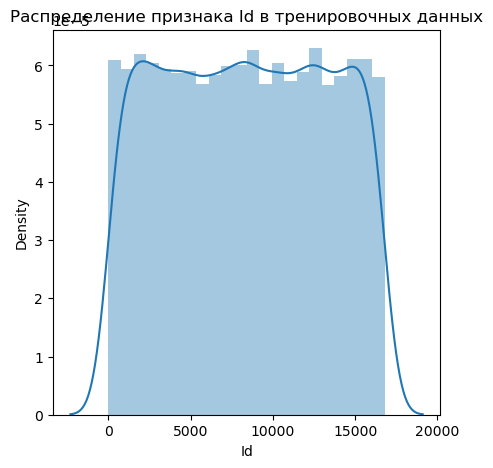

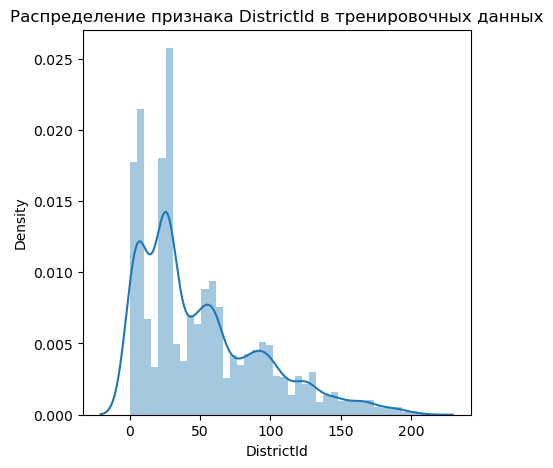

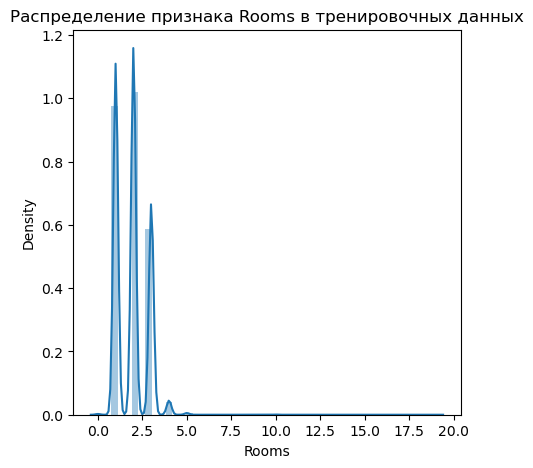

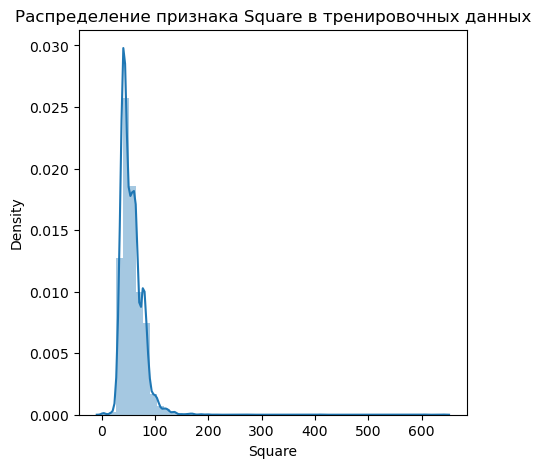

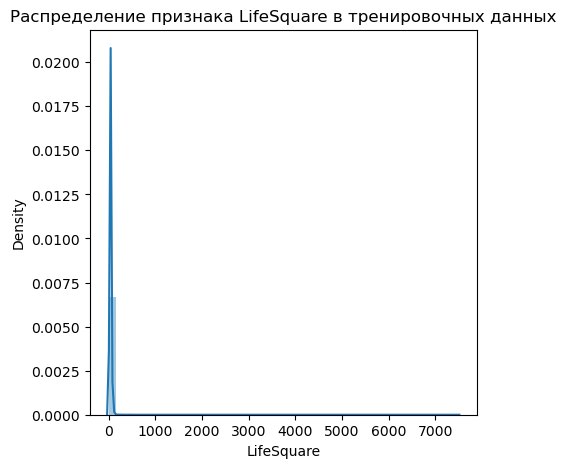

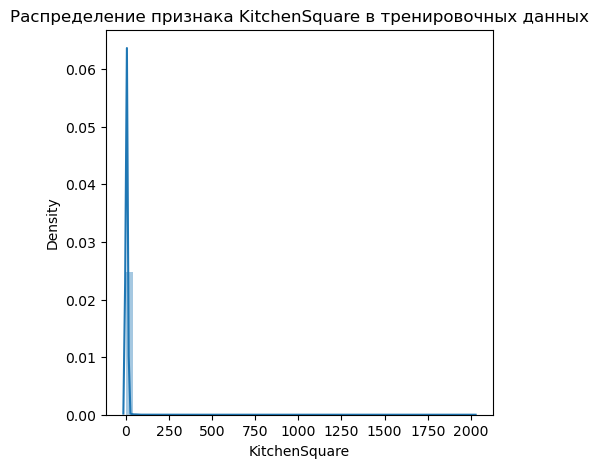

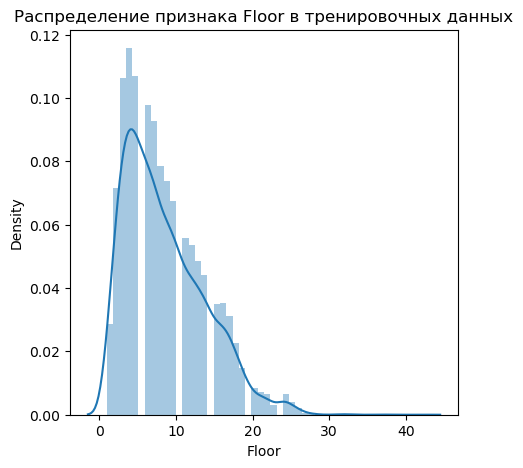

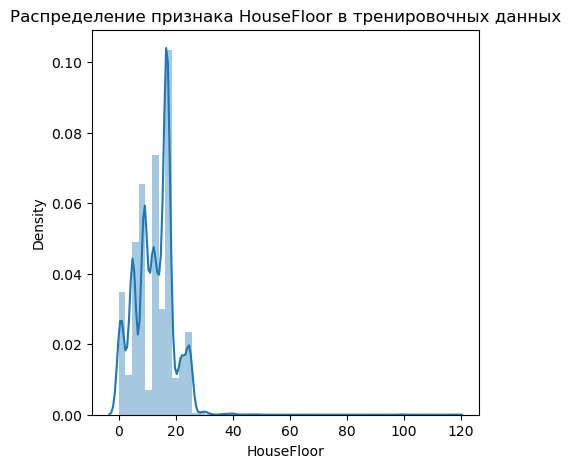

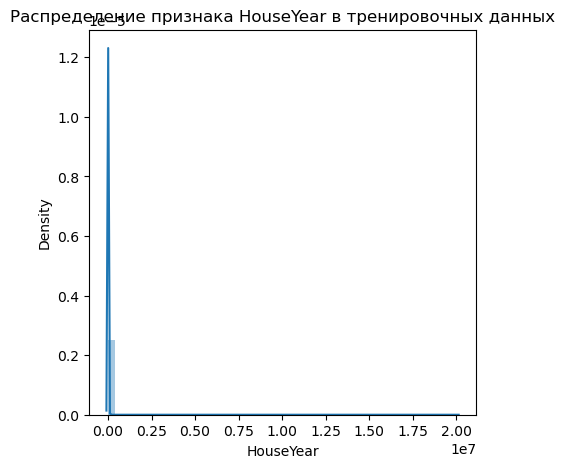

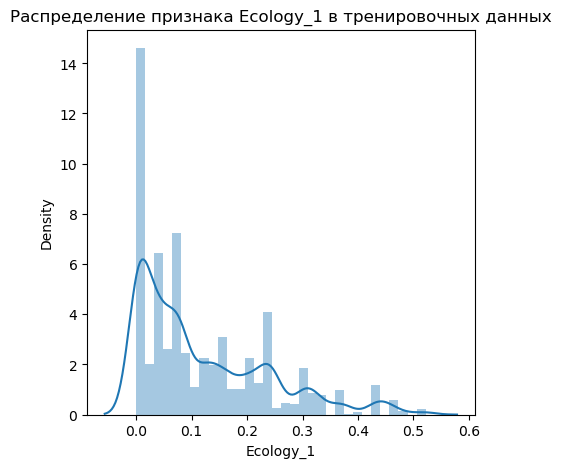

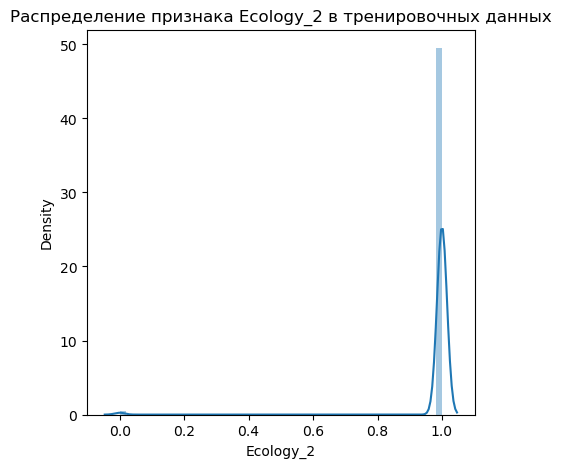

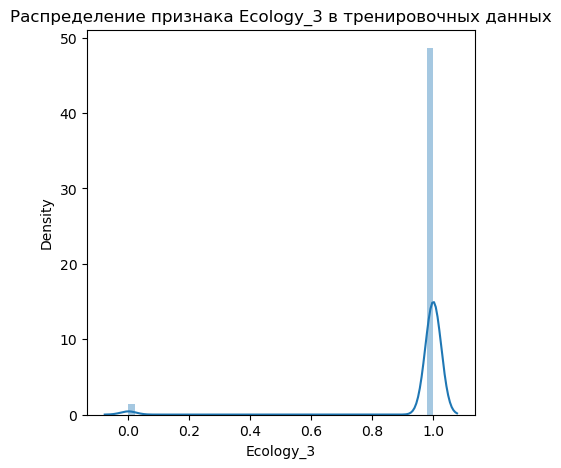

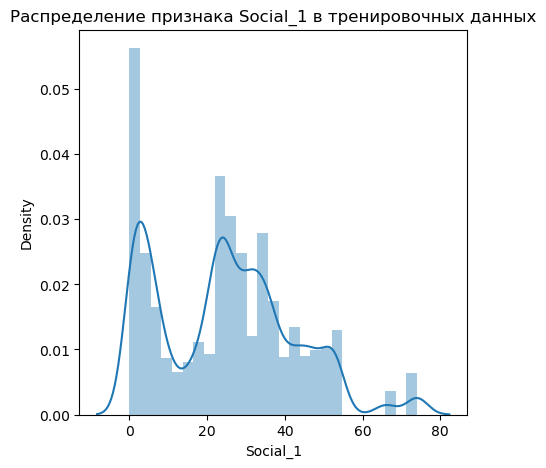

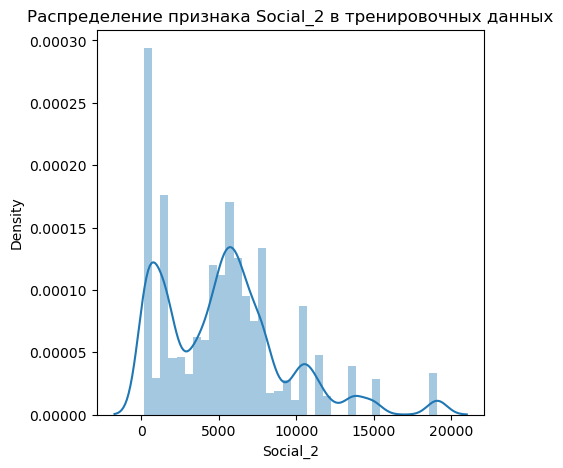

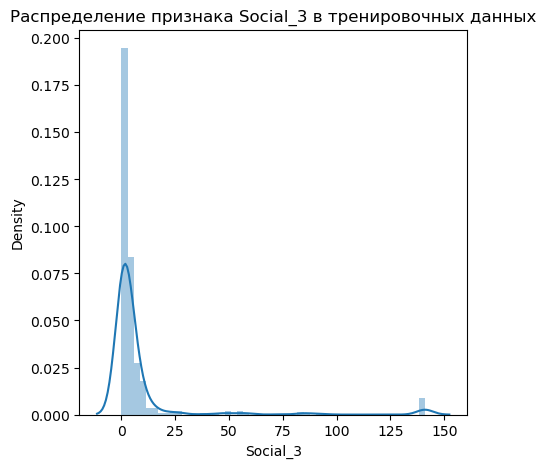

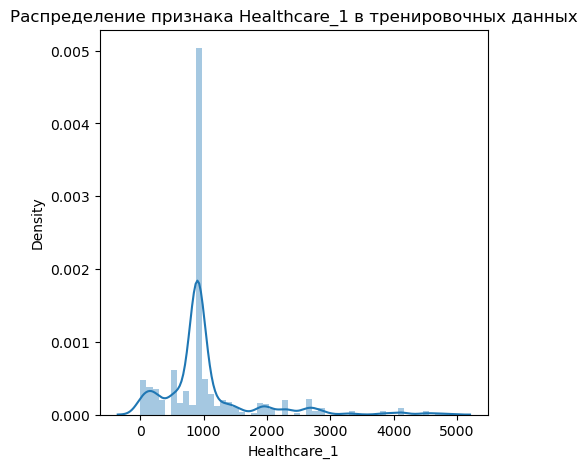

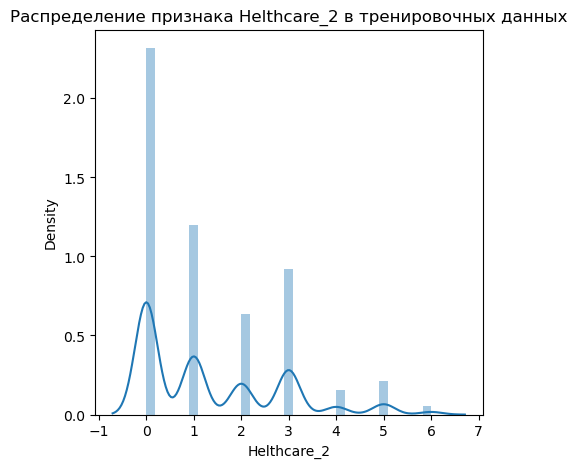

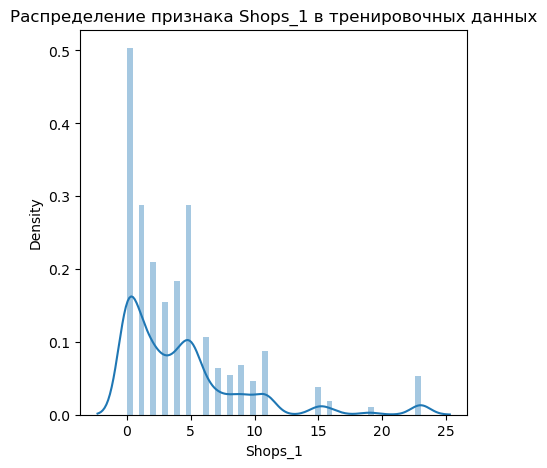

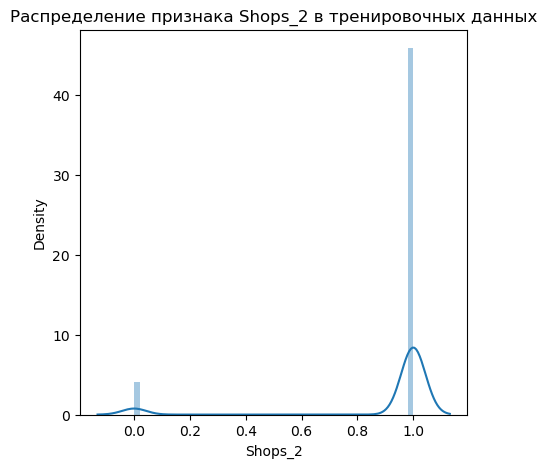

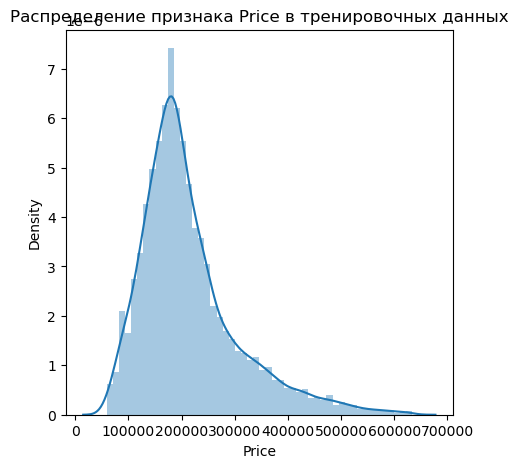

In [466]:
# численные признаки
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(df[col])

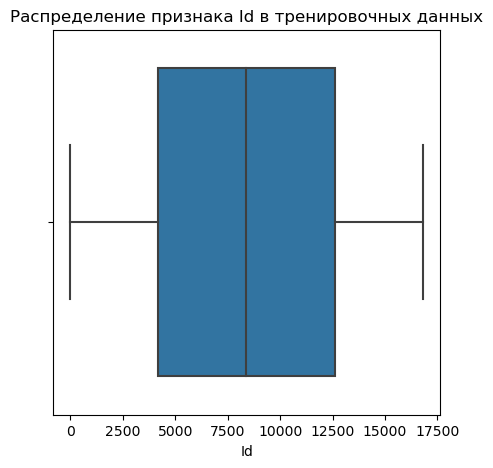

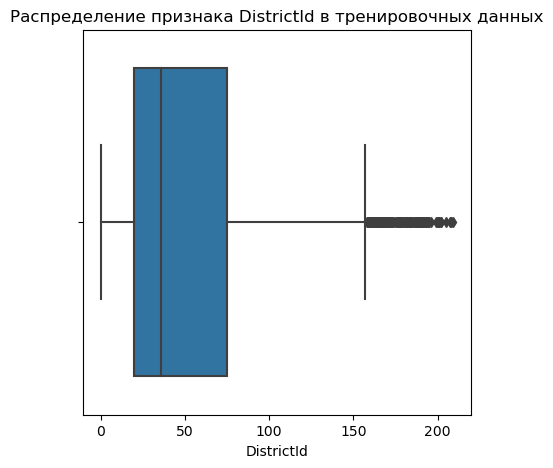

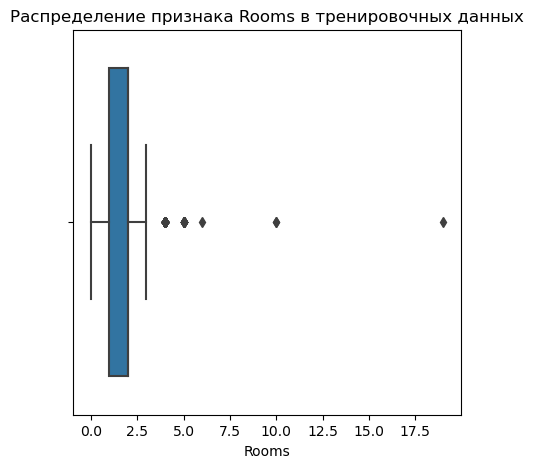

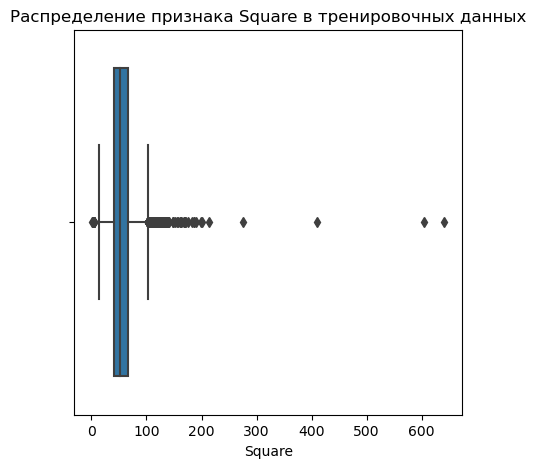

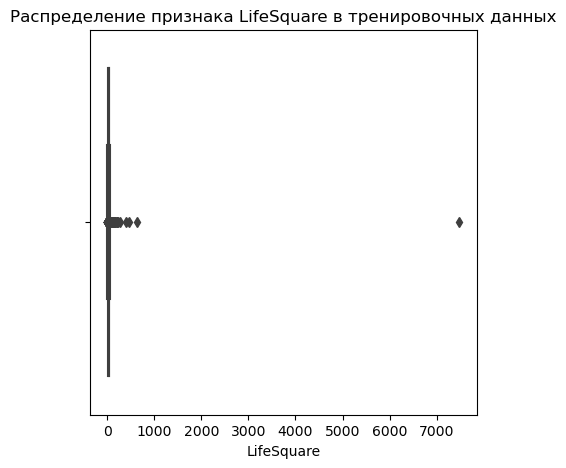

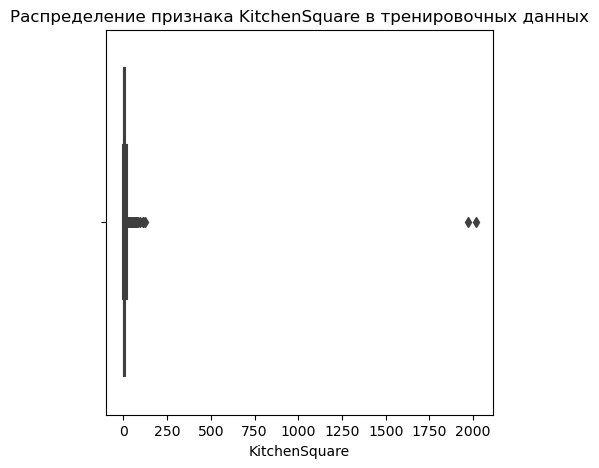

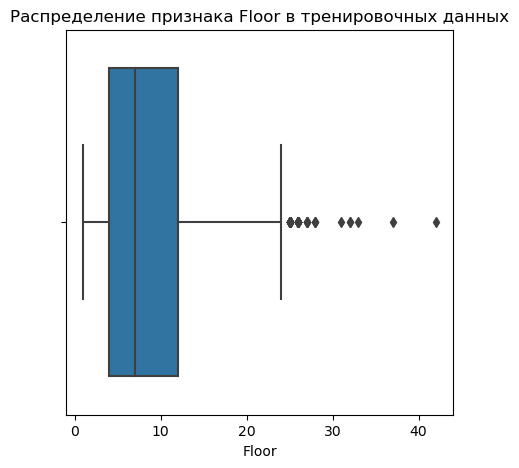

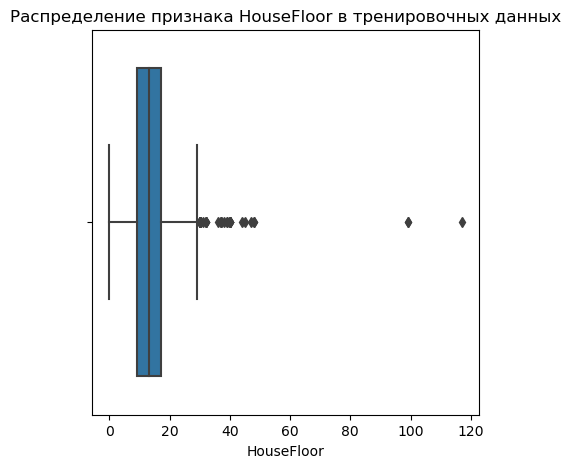

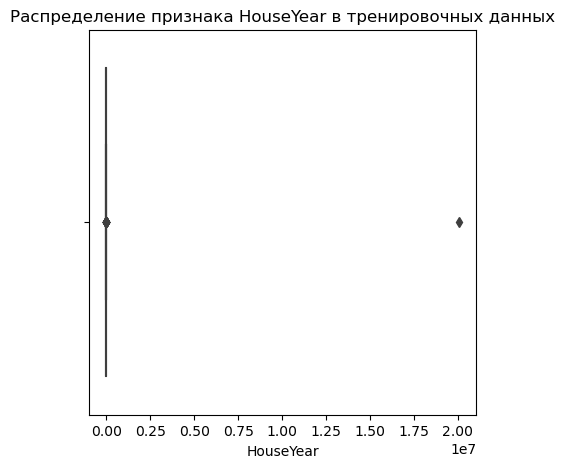

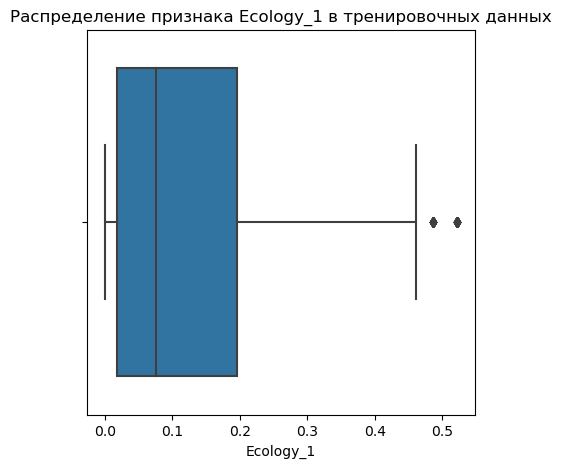

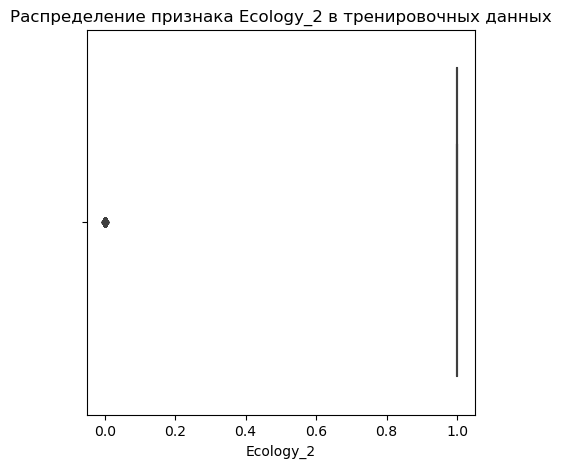

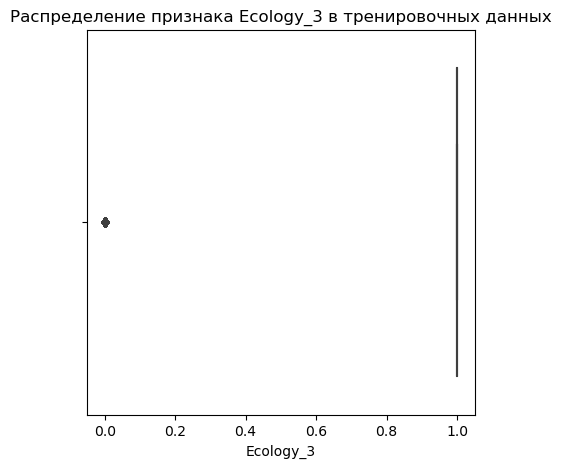

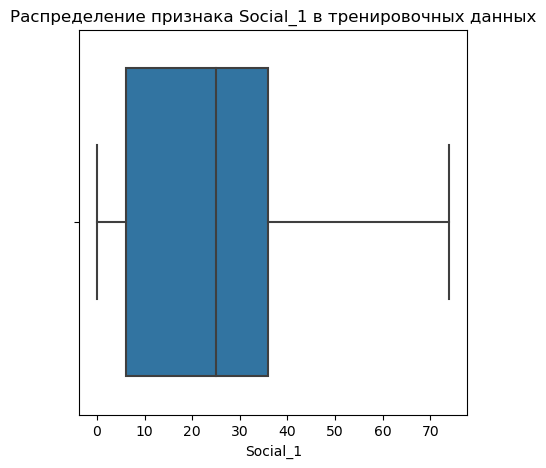

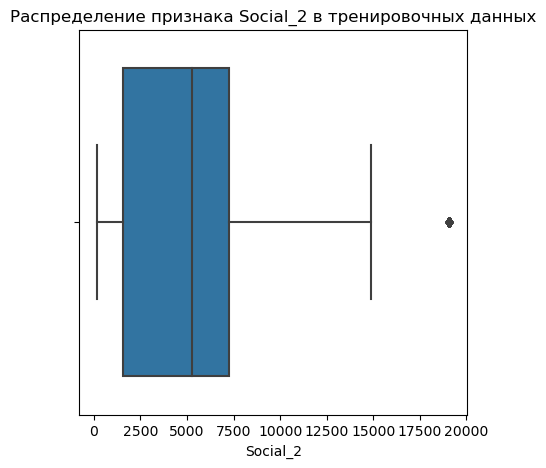

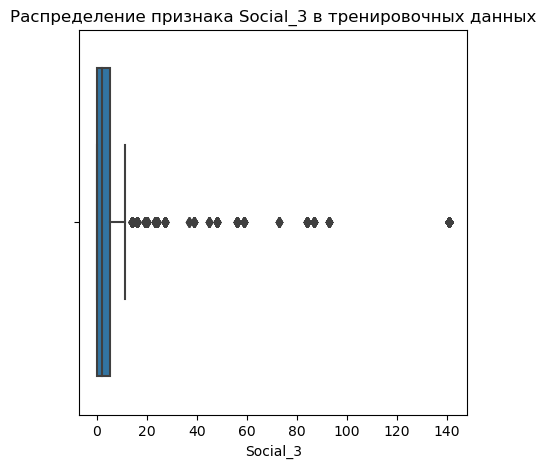

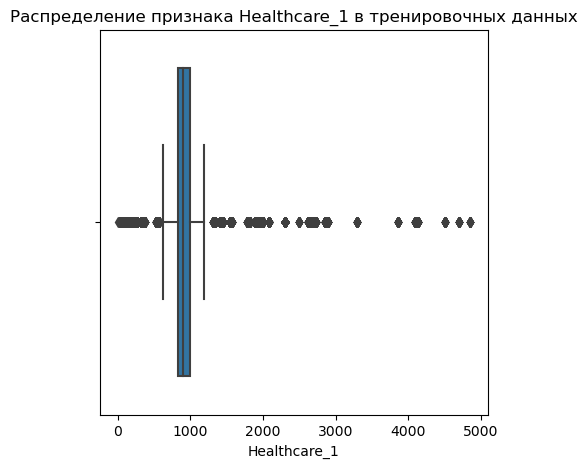

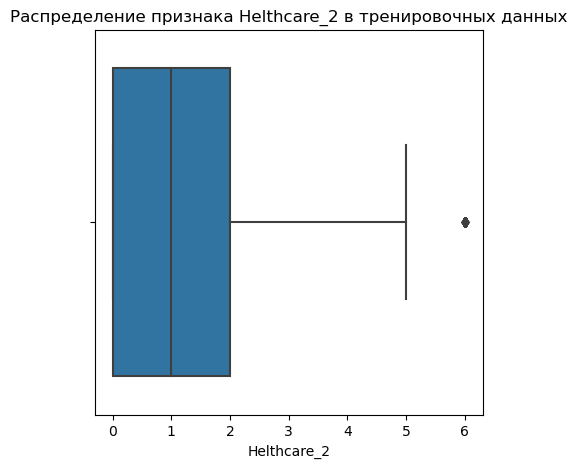

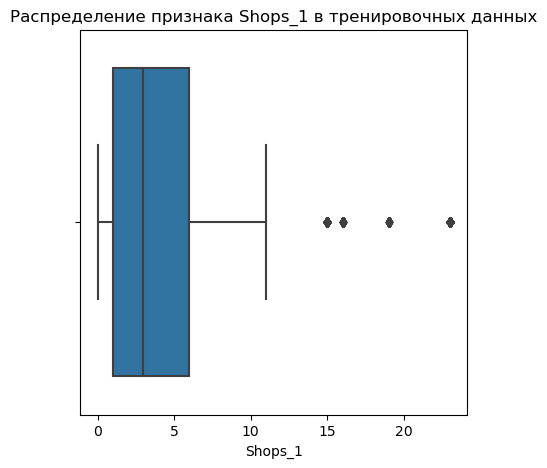

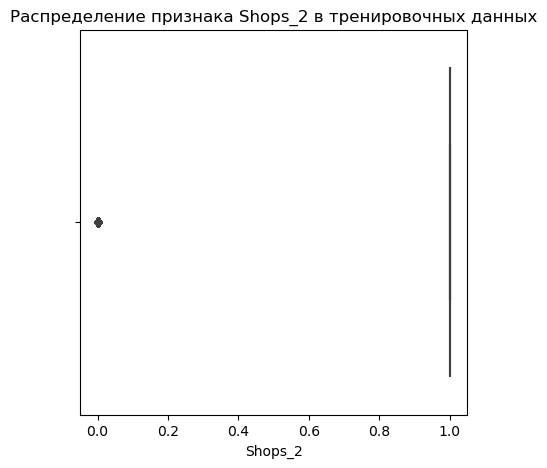

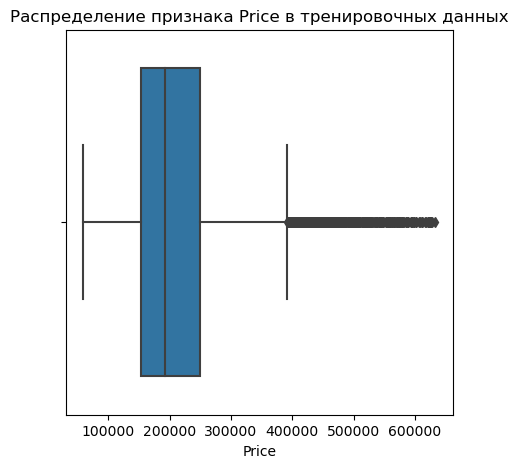

In [467]:
# выбросы численных признаков
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.boxplot(df[col])

In [468]:
# Удалим значения LifeSuqare больше 7000 , так как очень выбиваются
indexNames = df[df['LifeSquare'] > 7000].index
df.drop(indexNames, inplace=True)

In [469]:
# Удалим значения Square больше 250 , так как очень выбиваются
indexNames = df[df['Square'] > 250].index
df.drop(indexNames, inplace=True)

In [470]:
# Удалим значения Social_3 больше 12 , так как очень выбиваются
indexNames = df[df['Social_3'] > 12].index
df.drop(indexNames, inplace=True)

In [471]:
# винсоризация набора данных c большим количеством выбросов
from scipy.stats.mstats import winsorize

df['DistrictId'] = winsorize(df['DistrictId'], limits=[0.05, 0.05])
df['Rooms'] = winsorize(df['Rooms'], limits=[0.05, 0.05])
df['Square'] = winsorize(df['Square'], limits=[0.05, 0.05])
df['LifeSquare'] = winsorize(df['LifeSquare'], limits=[0.05, 0.05])
df['KitchenSquare'] = winsorize(df['KitchenSquare'], limits=[0.05, 0.05])
df['Floor'] = winsorize(df['Floor'], limits=[0.05, 0.05])
df['HouseFloor'] = winsorize(df['HouseFloor'], limits=[0.05, 0.05])
df['HouseYear'] = winsorize(df['HouseYear'], limits=[0.05, 0.05])
df['Social_3'] = winsorize(df['Social_3'], limits=[0.05, 0.05])
df['Healthcare_1'] = winsorize(df['Healthcare_1'], limits=[0.05, 0.05])
df['Shops_1'] = winsorize(df['Shops_1'], limits=[0.05, 0.05])

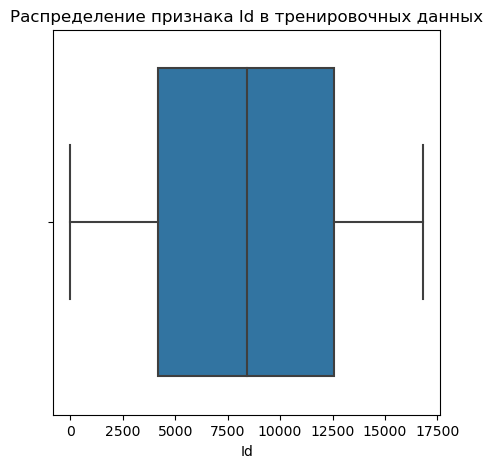

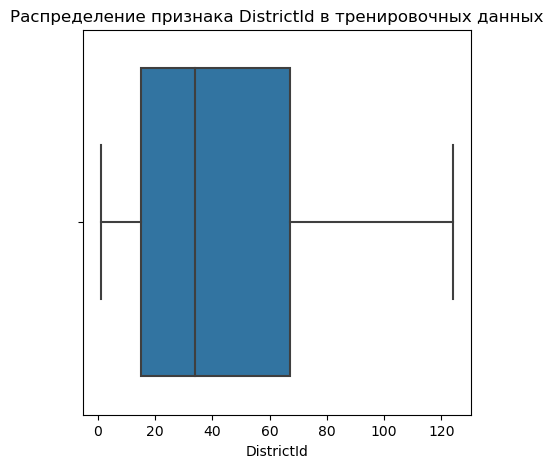

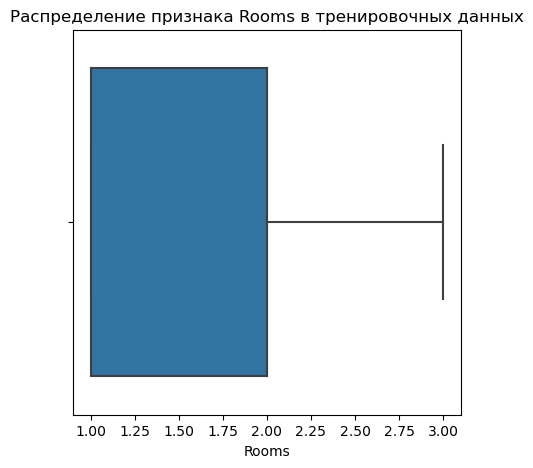

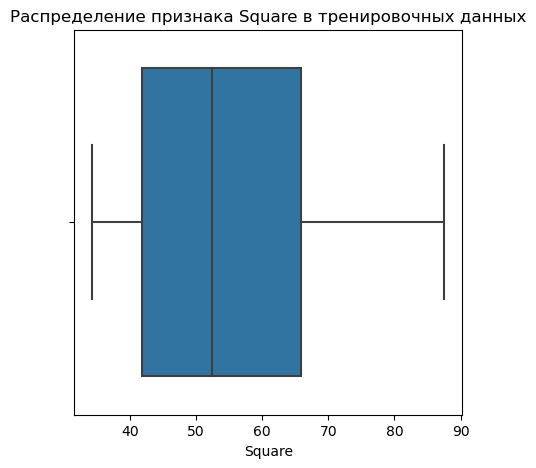

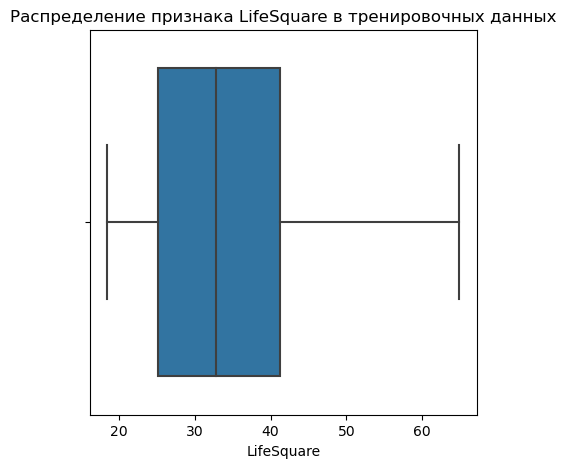

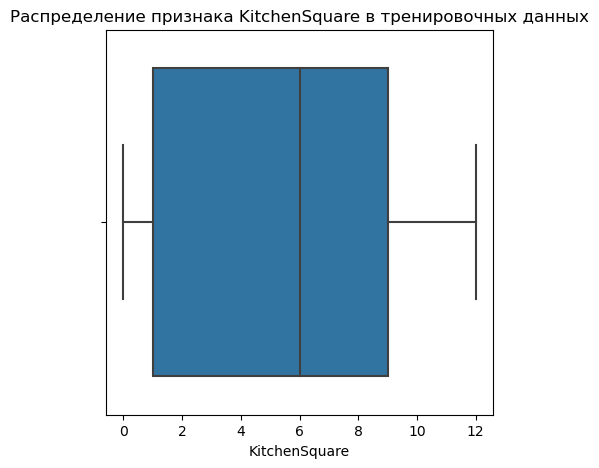

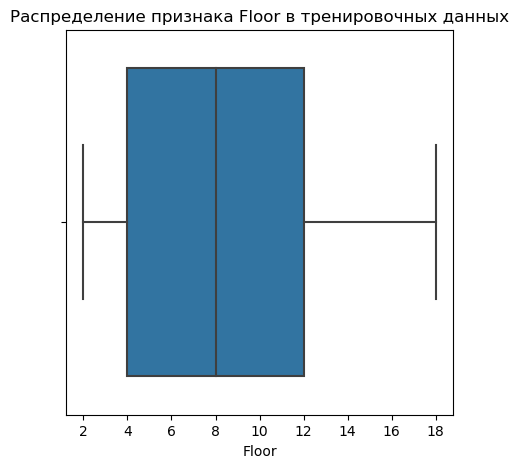

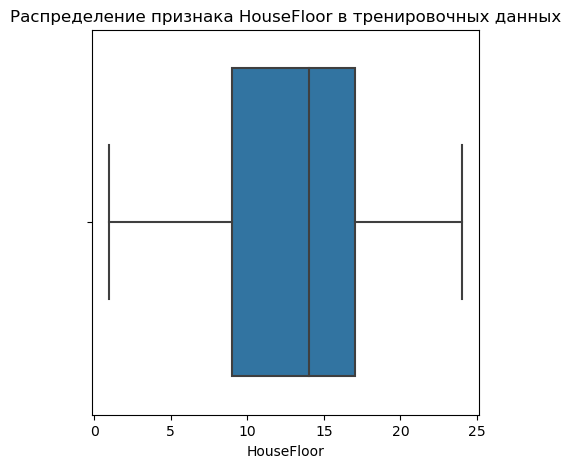

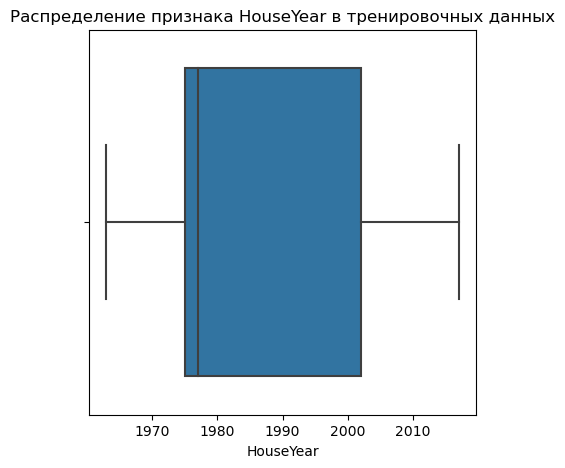

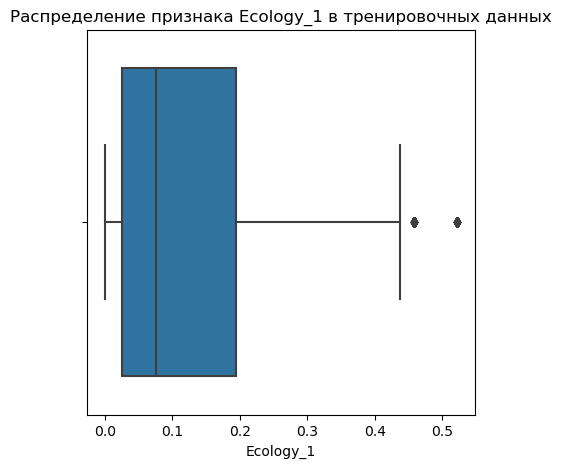

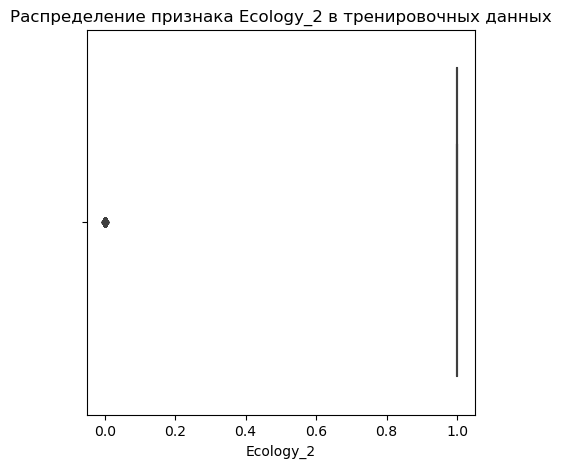

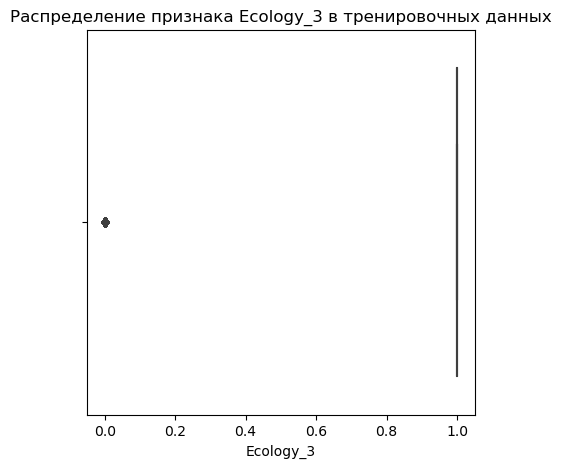

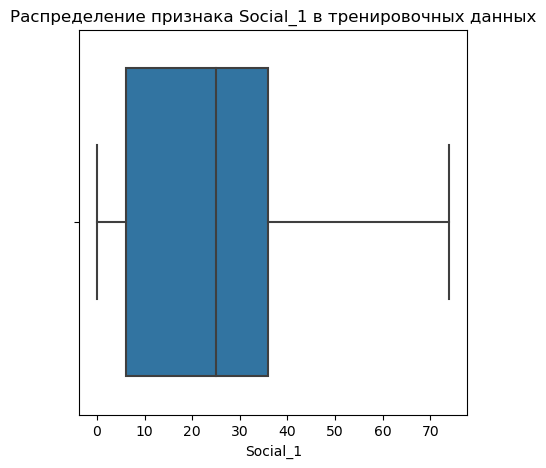

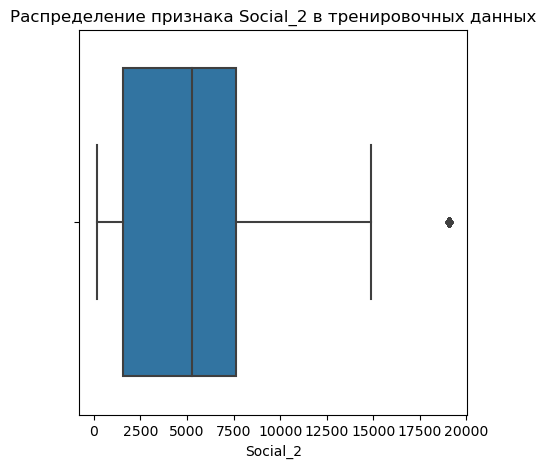

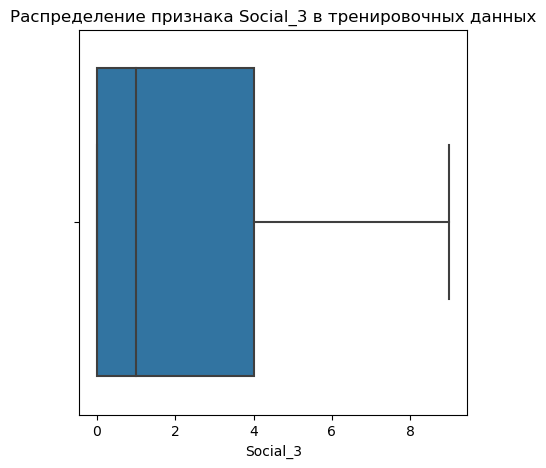

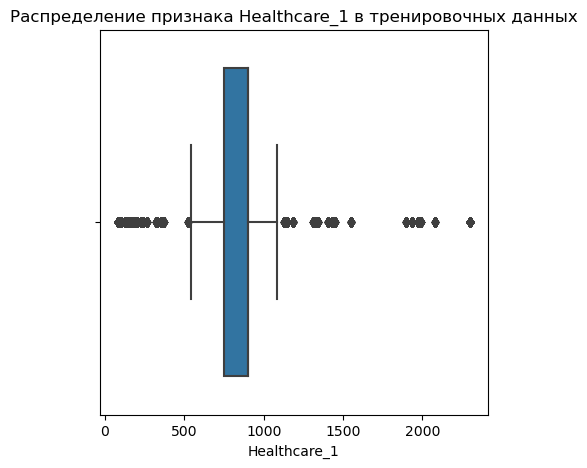

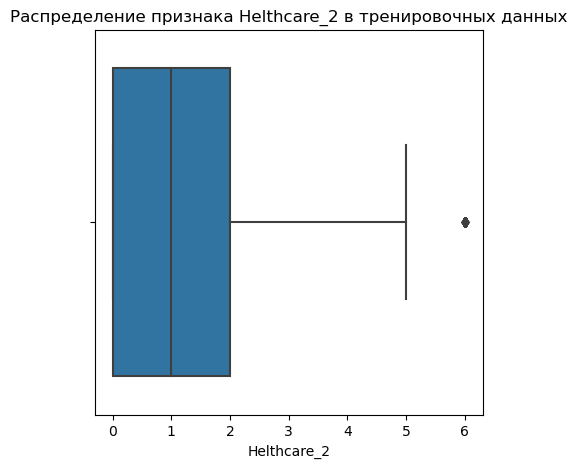

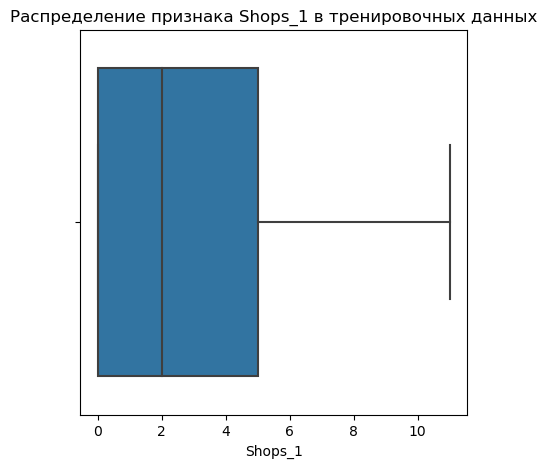

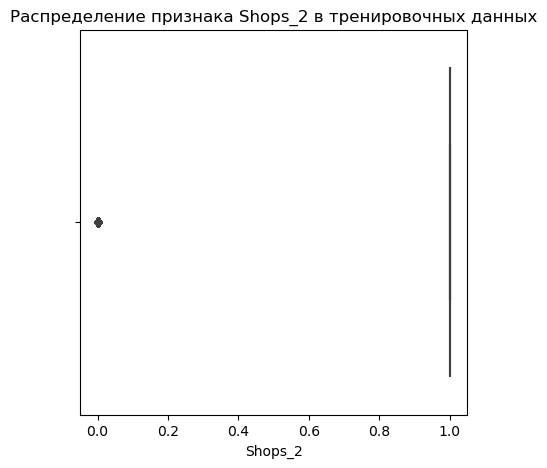

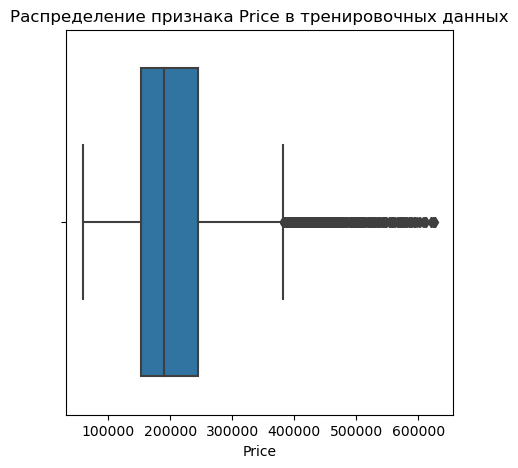

In [472]:
# выбросы численных признаков
for col in num_cols:
    plt.figure(figsize = (5, 5))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.boxplot(df[col])

### Предсказание. Выбор модели.

In [473]:
# Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке
X = df.drop('Price', axis = 1)
y = df['Price']

In [474]:
# Разбиение данных на тренировочную и тестовую выборку
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [475]:
# модель линейной регрессии
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [476]:
# обучение модели на тренировочных данных
lr.fit(X_train, y_train)

LinearRegression()

In [477]:
# предсказание модели на тестовых данных
y_pred = lr.predict(X_test)

y_pred.shape

(2741,)

In [478]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [479]:
# обучение модели на тренировочных данных
model.fit(X_train, y_train.values)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [480]:
# предсказание модели на тестовых данных
y_pred_2 = model.predict(X_test)

y_pred_2.shape

(2741,)

In [481]:
# сопоставление реальных значения с предсказанными
check_test = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred.flatten(),
    "y_pred_2": y_pred_2,
})

check_test.head(10)

,y_test,y_pred,y_pred_2
767,152489.158809,142348.336784,156628.933188
51,148862.210174,136212.377488,157850.105051
4363,194261.281283,226846.776687,204352.665753
1651,186290.427969,203339.456404,186397.895373
4026,469497.535186,320395.755680,489301.428740
3108,188395.634666,200194.954857,178665.115129
2734,126277.109148,283719.305231,193046.096178
4573,176841.331262,182444.157419,168845.045173
7483,236804.280037,238310.521290,218532.954561
6926,134605.887733,122976.920704,144390.106793


In [482]:
#Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.
check_test["error"] = check_test["y_pred"] - check_test["y_test"] 
check_test["error_2"] = check_test["y_pred_2"] - check_test["y_test"] 
check_test.head()

,y_test,y_pred,y_pred_2,error,error_2
767,152489.158809,142348.336784,156628.933188,-10140.822024,4139.774380
51,148862.210174,136212.377488,157850.105051,-12649.832686,8987.894877
4363,194261.281283,226846.776687,204352.665753,32585.495404,10091.384470
1651,186290.427969,203339.456404,186397.895373,17049.028435,107.467404
4026,469497.535186,320395.755680,489301.428740,-149101.779507,19803.893554


In [483]:
from sklearn.metrics import r2_score 
r2_score_1=r2_score(check_test["y_pred"], check_test["y_test"]) 
print("r2_score_1:" , r2_score_1)

r2_score_2=r2_score(check_test["y_pred_2"], check_test["y_test"]) 
print("r2_score_1:" , r2_score_2)

r2_score_1: 0.29004779482236465
r2_score_1: 0.6404647208263579


Выбираем вторую модель, так как >0,6. 

### Предсказание на тестовом файле

In [484]:
#  загрузим тестовые данные

df_test = pd.read_csv("./GB_HW6/test.csv")
df_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [485]:
# Преобразуем буквеное обозначение в цифровое
df_test['Ecology_2'] = le.fit_transform(df_test['Ecology_2'].astype(str))
df_test['Ecology_3'] = le.fit_transform(df_test['Ecology_3'].astype(str))
df_test['Shops_2'] = le.fit_transform(df_test['Shops_2'].astype(str))

df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,NaN,0,0,1
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,NaN,0,2,1
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,NaN,3,3,1
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1,1,36,5992,0,NaN,1,1,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,1,1,264,0,NaN,0,1,1
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1,1,74,19083,2,NaN,5,15,1
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,1,1,2,629,1,NaN,0,0,0


In [486]:
# заполняем отсутсвующие значения медианными
df_test['LifeSquare'].fillna(df_test['LifeSquare'].median(), inplace=True)
df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median(), inplace=True)

In [487]:
test_predict = model.predict(df_test)

In [488]:
df_test['Price'] = test_predict
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,1,1,11,2748,1,900.0,0,0,1,153881.171232
1,15856,74,2.0,69.263183,32.925087,1.0,6,1.0,1977,0.075779,1,1,6,1437,3,900.0,0,2,1,225863.066356
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,1,1,30,7538,87,4702.0,5,5,1,160448.892855
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,1,1,23,4583,3,900.0,3,3,1,324148.960644
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,1,1,2,629,1,900.0,0,0,0,140193.033468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,1,1,36,5992,0,900.0,1,1,1,252342.777643
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,1,1,1,264,0,900.0,0,1,1,135612.846879
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,1,1,74,19083,2,900.0,5,15,1,322580.256259
4998,4780,62,2.0,81.305222,32.925087,0.0,4,0.0,1977,0.072158,1,1,2,629,1,900.0,0,0,0,208348.222909


In [489]:
df_test[['Id', 'Price']].to_csv('MGorkova_predictions.csv', index=None)